In [1]:
from sympy import *
from dtumathtools import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()
def inner(x1: Matrix,x2: Matrix):
    '''
    Computes the inner product of two vectors of same length.
    '''

    return x1.dot(x2, conjugate_convention = 'right')

MutableDenseMatrix.inner = inner
ImmutableDenseMatrix.inner = inner
x, y ,z ,n, u, v, θ, ϕ = symbols('x,y,z,n,u,v,θ, ϕ')

In [2]:
θ_s, θ_p, ϕ_s, ϕ_p, r_s = symbols('θ_s, θ_p, ϕ_s, ϕ_p, r_s', real = true)

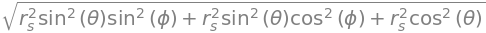

In [3]:
vpvs = (sqrt(((-r_s*sin(θ))*cos(ϕ))**2+(-r_s*sin(θ)*sin(ϕ))**2+(-r_s*cos(θ))**2))
#vpvs = vpvs.subs(r_s,1)
display(vpvs)
vpvs.simplify()

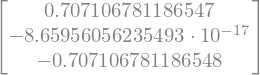

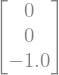

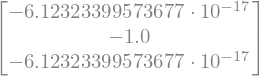

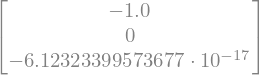

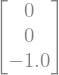

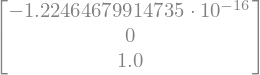

In [4]:
def solar_panel_projection(θ_s, ϕ_s, θ_p, ϕ_p):
    results = []
    for i in range(0,len(θ_s)):
        us = Matrix([-np.sin(θ_s[i]) * np.cos(ϕ_s[i]),-np.sin(θ_s[i]) * np.sin(ϕ_s[i]), -np.cos(θ_s[i])])
        up = Matrix([-1*np.sin(θ_p[i]) * np.cos(ϕ_p[i]), -np.sin(ϕ_p[i])*np.sin(θ_p[i]), -np.cos(θ_p[i])])
        display(us, up)
        inprod = (inner(us,up))
        simpinprod = inprod.simplify()
        if(simpinprod < 0):
            results.append(0.0)
        else:
            results.append(simpinprod)
    return results
theta_sol = np.array([np.pi / 4, np.pi / 2, 0.0])
phi_sol = np.array([np.pi, np.pi / 2, 0.0])
theta_panel = np.array([0.0, np.pi / 2, np.pi])
phi_panel = np.array([np.pi, 0.0, 0.0])

solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel)

In [5]:
θ_s, θ_p, ϕ_s, ϕ_p, r_s = symbols('θ_s, θ_p, ϕ_s, ϕ_p, r_s', real = true) # Variable til funktioner
us = Matrix([-sin(θ_s) * cos(ϕ_s),-sin(θ_s) * sin(ϕ_s), -cos(θ_s)]) # Vektoren for u_s
up = Matrix([-1*sin(θ_p) * cos(ϕ_p), -sin(ϕ_p)*sin(θ_p), -cos(θ_p)]) # Vektoren for u_p
inprod = (inner(us,up)) # Indre produkt beregnes
simpinprod = inprod.simplify() # Simplificeret indre produkt
inprodgrad = dtutools.gradient(simpinprod) # Gradienten af det simplificerede indre produkt
eq1 = Eq(inprodgrad, Matrix([0,0,0,0])) # Gradienten opsættes i en ligning med løsning som 0-vektoren (stationære punkter)
sols = solve(eq1) # Den angivne ligning løses
display(sols)
for i in range(0,len(sols)):
    display(inprod.subs(sols[i])) # Funktionsværdierne for de stationære punkter findes